In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
grades=pd.read_csv('student_grades.csv')

In [64]:
grades

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [65]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Column description and type of Data



Column 1: school

Description: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)


Column 2: sex

Description: student's sex (binary: 'F' - female or 'M' - male)


Column 3: age

Description: student's age (numeric: from 15 to 22)


Column 4: address

Description: student's home address type (binary: 'U' - urban or 'R' - rural)


Column 5: famsize

Description: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)


Column 6: Pstatus 

Description: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)


Column 7: Medu

Description: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)


Column 8: Fedu 

Description: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)


Column 9: Mjob

Description: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')


Column 10: Fjob

Description: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')


Column 11: reason

Description: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')


Column 12: guardian

Description: student's guardian (nominal: 'mother', 'father' or 'other')


Column 13: traveltime

Description: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)


Column 14: studytime

Description: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)


Column 15: failures

Description: number of past class failures (numeric: n if 1<=n<3, else 4)


Column 16: schoolsup

Description: extra educational support (binary: yes or no)


Column 17: famsup

Description: family educational support (binary: yes or no)


Column 18: paid

Description: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)


Column 19: activities

Description: extra-curricular activities (binary: yes or no)


Column 20: nursery

Description: attended nursery school (binary: yes or no)


Column 21: higher

Description: wants to take higher education (binary: yes or no)


Column 22: internet

Description: Internet access at home (binary: yes or no)


Column 23: romantic

Description: with a romantic relationship (binary: yes or no)


Column 24: famrel

Description: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)


Column 25: freetime

Description: free time after school (numeric: from 1 - very low to 5 - very high)


Column 26: goout

Description: going out with friends (numeric: from 1 - very low to 5 - very high)


Column 27: Dalc

Description: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)


Column 28: Walc

Description: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)


Column 29: health

Description: current health status (numeric: from 1 - very bad to 5 - very good)


Column 30: absences

Description: number of school absences (numeric: from 0 to 93)



The last 3 columns are grades in the 1st, 2nd and 3rd period:

Column 31: G1 - first period grade (numeric: from 0 to 20)

Column 32: G2 - second period grade (numeric: from 0 to 20)

Column 33: G3 - final grade (numeric: from 0 to 20, output target)

### Correalation Matrix of the numerical columns using a heatmap

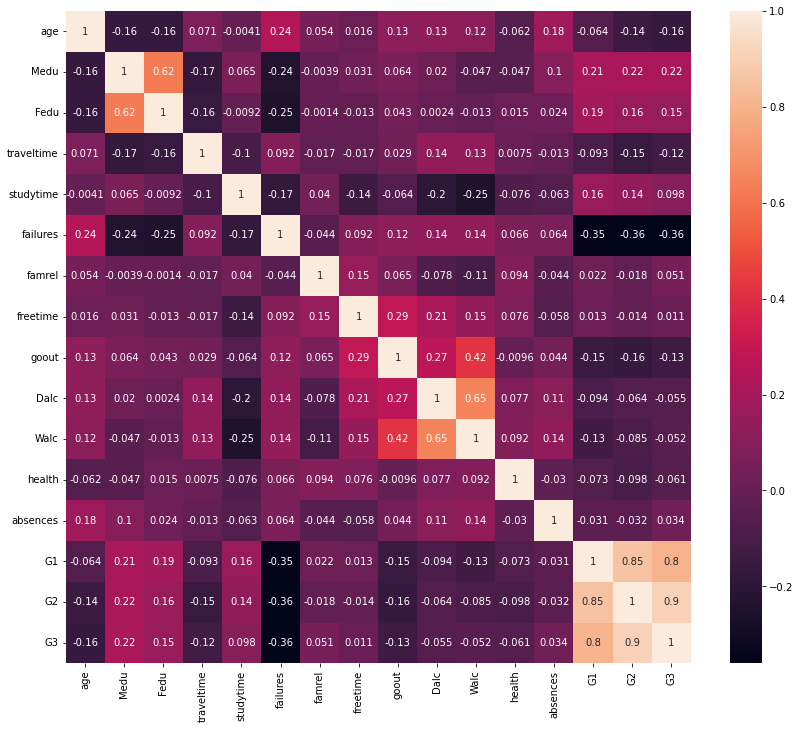

In [66]:
plt.figure(figsize=(14,12))
sns.heatmap(grades.corr(), annot=True)
plt.show()

### Infer from the above heatmap:

1.

In [67]:
#checking for null values:
grades.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [17]:
#this is a clean data. There are no null values

### Encoding

In [68]:
#types of each column
grades.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [69]:
#creating a list of non numeric columns
non_numeric_columns=[]
for index,data_type in enumerate(grades.dtypes):
    if data_type=='object':
        non_numeric_columns.append(grades.columns[index])
        
non_numeric_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [70]:
#find the unique values for the non numeric columns
for column in non_numeric_columns:
    print(column,':',grades[column].unique())

school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob : ['teacher' 'other' 'services' 'health' 'at_home']
reason : ['course' 'other' 'home' 'reputation']
guardian : ['mother' 'father' 'other']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


#### Majority of the columns are binary. For the binary columns we can map them to 0 and 1. For the rest, we will use one hot encoding. But all the categorical non-binary columns have a value called 'other'. Hence there will be duplicate values. So we will add the first letter of the categorical feature to each of the values of their respective features to avoid confusion.

In [71]:
for column in non_numeric_columns:
    if len(grades[column].unique())>2:
        grades[column]=grades[column].apply(lambda x: column[:1]+'_'+x)

In [72]:
grades

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,M_at_home,F_teacher,r_course,g_mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,M_at_home,F_other,r_course,g_father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,M_at_home,F_other,r_other,g_mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,M_health,F_services,r_home,g_mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,M_other,F_other,r_home,g_father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,M_services,F_other,r_reputation,g_mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,M_other,F_other,r_home,g_mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,M_other,F_teacher,r_home,g_mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,M_services,F_other,r_home,g_mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,M_other,F_other,r_home,g_mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [73]:
#using one hot encoding for the non-binary categorical variables and storing all of them in a single dataframe
dummies=pd.concat([pd.get_dummies(grades['Mjob']),
                   pd.get_dummies(grades['Fjob']),
                   pd.get_dummies(grades['reason']),
                   pd.get_dummies(grades['guardian'])],axis=1)

In [74]:
dummies

,M_at_home,M_health,M_other,M_services,M_teacher,F_at_home,F_health,F_other,F_services,F_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
6,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
7,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
8,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
9,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [75]:
# adding the dummies dataframe to the grades dataframe and then dropping the original non-binary categorical columns
grades=pd.concat([grades,dummies],axis=1)
grades.drop(['Mjob','Fjob','reason','guardian'],axis=1,inplace=True)
grades

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,M_at_home,M_health,M_other,M_services,M_teacher,F_at_home,F_health,F_other,F_services,F_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
5,GP,M,16,U,LE3,T,4,3,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
6,GP,M,16,U,LE3,T,2,2,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
7,GP,F,17,U,GT3,A,4,4,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
8,GP,M,15,U,LE3,A,3,2,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
9,GP,M,15,U,GT3,T,3,4,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [88]:
grades.shape

(395, 46)

In [76]:
#checking the remaing categorical columns again
non_numeric_columns=[]
for index,data_type in enumerate(grades.dtypes):
    if data_type=='object':
        non_numeric_columns.append(grades.columns[index])
        
for column in non_numeric_columns:
    print(column,':',grades[column].unique())

school : ['GP' 'MS']
sex : ['F' 'M']
address : ['U' 'R']
famsize : ['GT3' 'LE3']
Pstatus : ['A' 'T']
schoolsup : ['yes' 'no']
famsup : ['no' 'yes']
paid : ['no' 'yes']
activities : ['no' 'yes']
nursery : ['yes' 'no']
higher : ['yes' 'no']
internet : ['no' 'yes']
romantic : ['no' 'yes']


In [77]:
# we will be using LabelEncoder to convert these into numerical values:
encoder=LabelEncoder()
for columns in non_numeric_columns:
    grades[columns]=encoder.fit_transform(grades[columns])

In [78]:
for dtype in grades.dtypes:
    print(dtype)

int32
int32
int64
int32
int32
int32
int64
int64
int64
int64
int64
int32
int32
int32
int32
int32
int32
int32
int32
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


In [89]:
y=grades['G3']
X=grades.drop('G3',axis=1)

In [93]:
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [94]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,M_at_home,M_health,M_other,M_services,M_teacher,F_at_home,F_health,F_other,F_services,F_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,-0.363050,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,0.792251,-0.042286,-0.449944,2.597133,-1.257656,-0.919671,-1.017881,0.507899,0.230940,-2.232677,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
1,-0.363050,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,-0.919671,-1.017881,-1.968894,0.230940,0.447893,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
2,-0.363050,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,2.597133,-1.257656,1.087346,-1.017881,0.507899,0.230940,0.447893,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,3.157883,-0.601722,-0.543214,0.668496,-0.296908
3,-0.363050,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-0.385040,0.795130,1.087346,0.982433,0.507899,0.230940,0.447893,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,-0.419041,3.258473,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
4,-0.363050,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,1.087346,-1.017881,0.507899,0.230940,-2.232677,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.419041,-0.306892,1.342169,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
5,-0.363050,1.054656,-0.546287,0.535392,1.570004,0.340322,1.143856,0.440257,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,1.087346,0.982433,0.507899,0.230940,0.447893,-0.708450,1.178860,0.766399,-0.997295,-0.540699,-0.226345,1.041070,0.536865,1.234133,1.140903,-0.419041,-0.306892,-0.745062,1.683731,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,-0.316668,1.661898,-0.543214,0.668496,-0.296908
6,-0.363050,1.054656,-0.546287,0.535392,1.570004,0.340322,-0.685387,-0.479857,-0.643249,-0.042286,-0.449944,-0.385040,-1.257656,-0.919671,-1.017881,0.507899,0.230940,0.447893,-0.708450,0.062194,0.766399,0.801479,-0.540699,-1.003789,-0.399289,-0.714236,0.329153,0.342338,-0.419041,-0.306892,1.342169,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
7,-0.363050,-0.948176,0.238380,0.535392,-0.636941,-2.938392,1.143856,1.360371,0.792251,-0.042286,-0.449944,2.597133,0.795130,-0.919671,-1.017881,0.507899,0.230940,-2.232677,-0.708450,0.062194,-2.240828,0.801479,-0.540699,-1.003789,-1.839649,0.036424,-1.480807,-1.520979,-0.419041,-0.306892,1.342169,-0.593919,-0.414858,-0.230940,-0.218507,-1.104129,-0.625176,3.552561,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
8,-0.363050,1.054656,-1.330954,0.535392,1.570004,-2.938392,0.229234,-0.479857,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,1.087346,-1.017881,0.507899

In [95]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [96]:
print("R squared value for the model:",model.score(X_test,y_test))

R squared value for the model: 0.8479908939571128
